# 1.ANN Implementation

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


# 2.Load and preprocess the MNIST dataset


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess data
x_train = x_train.reshape(60000, 784).astype('float32') / 255
x_test = x_test.reshape(10000, 784).astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 3.Define the architecture


In [ ]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model


<Sequential name=sequential, built=True>

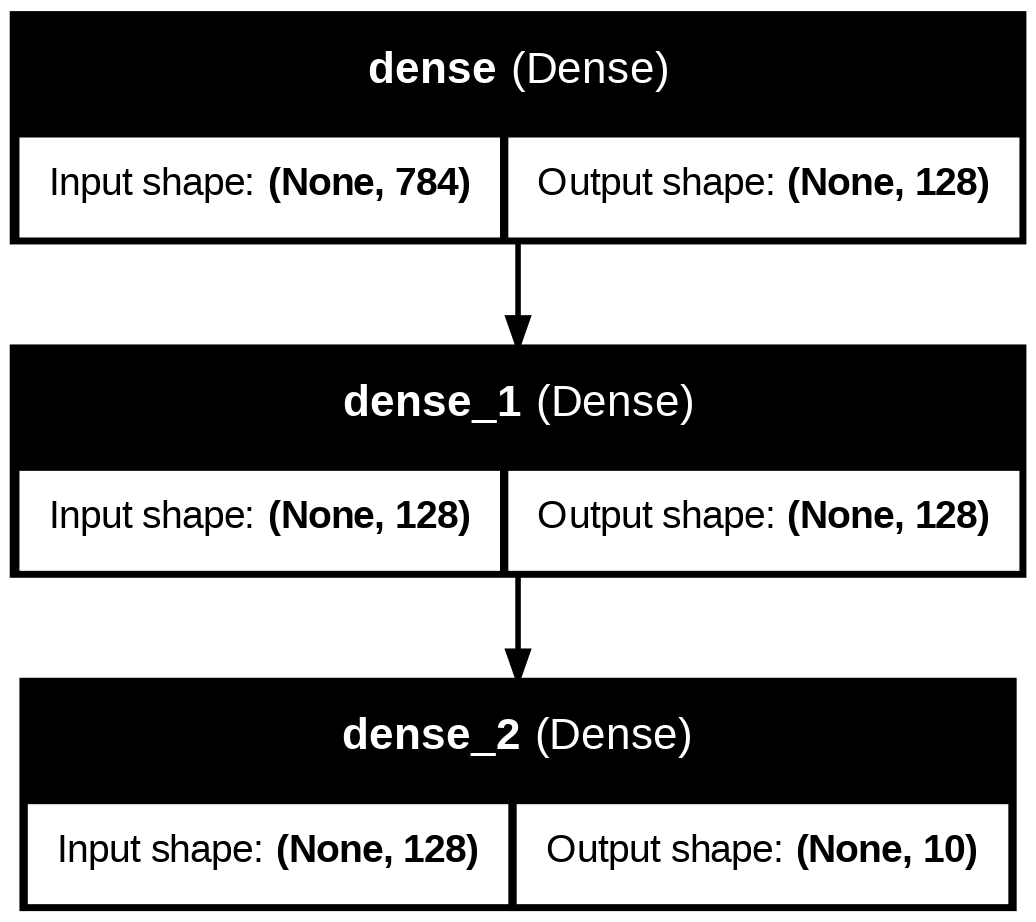

In [ ]:
from keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True,)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# Compile the MODEL

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
# 1
import os
import datetime

In [ ]:
#2
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
print(logdir)

logs/20240925-060732


# Train the model

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8855 - loss: 0.3985 - val_accuracy: 0.9665 - val_loss: 0.1074
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9692 - loss: 0.1013 - val_accuracy: 0.9750 - val_loss: 0.0859
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9811 - loss: 0.0636 - val_accuracy: 0.9754 - val_loss: 0.0852
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9838 - loss: 0.0507 - val_accuracy: 0.9742 - val_loss: 0.0824
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9874 - loss: 0.0397 - val_accuracy: 0.9731 - val_loss: 0.0919
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9892 - loss: 0.0325 - val_accuracy: 0.9781 - val_loss: 0.0842
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9918 - loss: 0.0261 - val_accuracy: 0.9749 - val_loss: 0.0977
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9929 - loss: 0.0218

# Evalute the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9709 - loss: 0.1194
Test accuracy: 0.9761999845504761


#CNN implementation

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# 2. Load and preprocess

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


# Preprocess data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


#3. Define the CNN Model:

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax') ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Complie the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 62s 155ms/step - accuracy: 0.3561 - loss: 1.7883 - val_accuracy: 0.5581 - val_loss: 1.2608
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 63s 160ms/step - accuracy: 0.5735 - loss: 1.2145 - val_accuracy: 0.6070 - val_loss: 1.1229
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 159ms/step - accuracy: 0.6297 - loss: 1.0688 - val_accuracy: 0.6411 - val_loss: 1.0384
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 61s 156ms/step - accuracy: 0.6522 - loss: 0.9945 - val_accuracy: 0.6407 - val_loss: 1.0399
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 62s 157ms/step - accuracy: 0.6839 - loss: 0.9244 - val_accuracy: 0.6611 - val_loss: 0.9703
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 153ms/step - accuracy: 0.7063 - loss: 0.8552 - val_accuracy: 0.6675 - val_loss: 0.9527
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 82s 154ms/step - accuracy: 0.7247 - loss: 0.7987 - val_accuracy: 0.6914 - val_loss: 0.9046
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 62s 159ms/step - accuracy: 0.7424 - loss: 0

# Evaluate the model

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6990 - loss: 0.8909
Test accuracy: 0.6991000175476074


#  Visualization

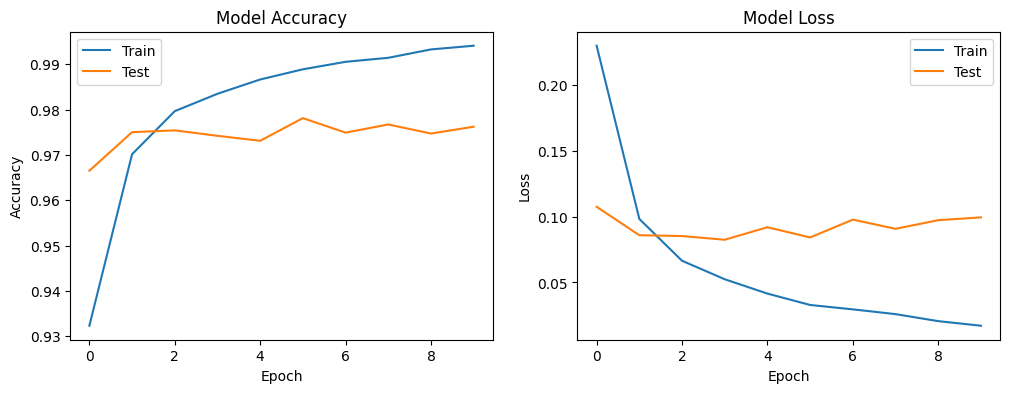

In [ ]:
import matplotlib.pyplot as plt

# Plot accuracy and loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])


plt.show()